In [2]:
import numpy as np
import pandas as pd
# import pandas_profiling
import pprint

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import pyplot
%matplotlib inline

# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('US_Accidents_Dec19.csv')
df.columns = map(str.lower, df.columns)

df = df.assign(start_time = pd.to_datetime(df['start_time']),  #convert dtype to datetime
               end_time = pd.to_datetime(df['end_time']))      #convert dtype to datetime
                      

df = df.assign(day_of_week = df.start_time.dt.day_name(), #column for day of week)    
               hour = df.start_time.dt.hour,
               month = df.start_time.dt.month)                         

df = df.assign(weekday = df.day_of_week\
               .apply(lambda x: 'weekend' if x == 'Saturday' or x=='Sunday' else 'weekday'))


df.head()

,id,source,tmc,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,day_of_week,hour,month,weekday
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday,5,2,weekday
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday,6,2,weekday
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,Monday,6,2,weekday
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,Monday,7,2,weekday
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Monday,7,2,weekday


<Figure size 864x432 with 0 Axes>

[Text(0, 0, 'Clear'),
 Text(0, 0, 'Overcast'),
 Text(0, 0, 'Mostly Cloudy'),
 Text(0, 0, 'Partly Cloudy'),
 Text(0, 0, 'Scattered Clouds'),
 Text(0, 0, 'Haze'),
 Text(0, 0, 'Fair'),
 Text(0, 0, 'Light Rain'),
 Text(0, 0, 'Fog'),
 Text(0, 0, 'Light Snow')]

Text(0.5, 1.0, 'missing precipitation by %weather condition')

,weather_condition,count,percent_total
0,Clear,803323,40.199154
1,Overcast,327976,16.412274
2,Mostly Cloudy,295084,14.766323
3,Partly Cloudy,209239,10.470546
4,Scattered Clouds,200023,10.009368
5,Haze,26935,1.347857
6,Fair,16006,0.800958
7,Light Rain,12034,0.602194
8,Fog,11376,0.569267
9,Light Snow,6495,0.325017


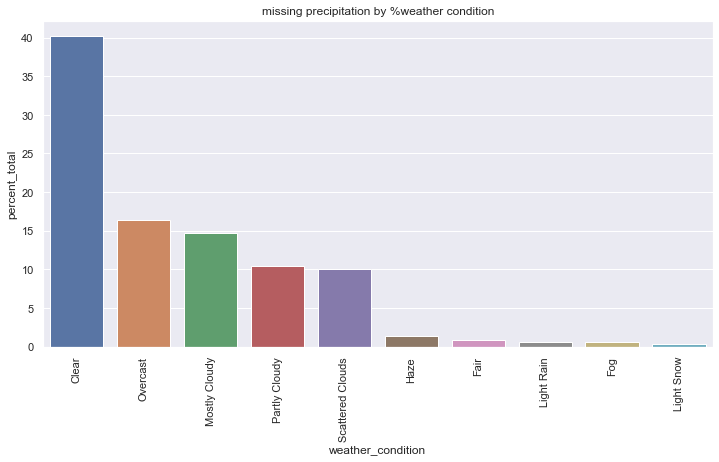

In [3]:
nan_prec = df[df['precipitation(in)'].isnull()].groupby(by='weather_condition')['id'].count().reset_index()
nan_prec.rename(columns={'id':'count'}, inplace=True)

nan_total = len(df[df['precipitation(in)'].isnull()])

nan_prec = nan_prec.assign(percent_total = nan_prec['count'] / nan_total * 100)
nan_prec = nan_prec.sort_values(by='percent_total', ascending=False).reset_index(drop=True)
nan_prec = nan_prec.head(10)

sns.set()
plt.figure(figsize=(12,6))
g = sns.barplot(x='weather_condition', y='percent_total', data=nan_prec)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('missing precipitation by %weather condition')

display(nan_prec)

,weather_condition,severity,state
2,Overcast,2,OH
3,Mostly Cloudy,3,OH
4,Mostly Cloudy,2,OH
6,Overcast,2,OH
7,Overcast,3,OH
8,Mostly Cloudy,2,OH
12,Overcast,2,OH
13,Mostly Cloudy,2,OH
15,Overcast,2,OH
16,Mostly Cloudy,2,OH


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'missing precipitation count by weather_condition')

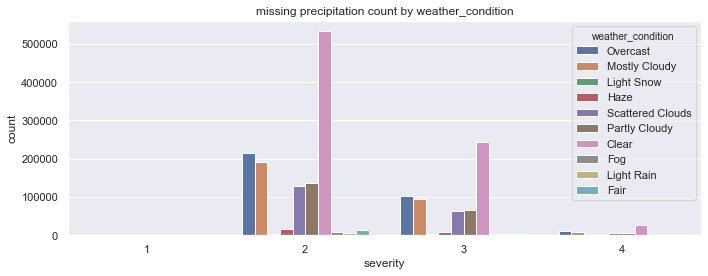

In [4]:
weather_list = nan_prec.weather_condition.unique()

prec_ws = df[df['precipitation(in)'].isnull()][['weather_condition', 'severity', 'state']]
prec_ws = prec_ws[prec_ws['weather_condition'].isin(weather_list)]
prec_ws['severity'] = prec_ws['severity'].astype('category')

display(prec_ws)

sns.set()


plt.figure(figsize=(10, 4))
ax = sns.countplot(x='severity', data=prec_ws, hue='weather_condition')
ax.set_title('missing precipitation count by weather_condition')

plt.tight_layout()
plt.show()

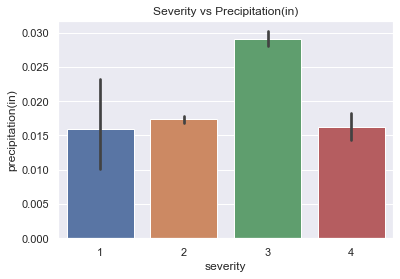

In [5]:
prec_data = df[~df['precipitation(in)'].isnull()]\
                [['weather_condition', 'severity', 'state', 'precipitation(in)']]

g = sns.barplot(x=prec_data['severity'], y=prec_data['precipitation(in)'])\
                .set_title('Severity vs Precipitation(in)')

plt.show()

In [6]:
top_weather = df[~df['precipitation(in)'].isnull()]\
                .groupby(by=['weather_condition'])['severity'].count().reset_index()\
                .sort_values(by='severity', ascending=False)

print('data without missing precipitation(in): ' + str(top_weather['severity'].sum()))
print('data with missing precipitation(in): ' + str(nan_prec['count'].sum()))
print('total data: ' + str(top_weather['severity'].sum() + nan_prec['count'].sum()))

data without missing precipitation(in): 970370
data with missing precipitation(in): 1908491
total data: 2878861


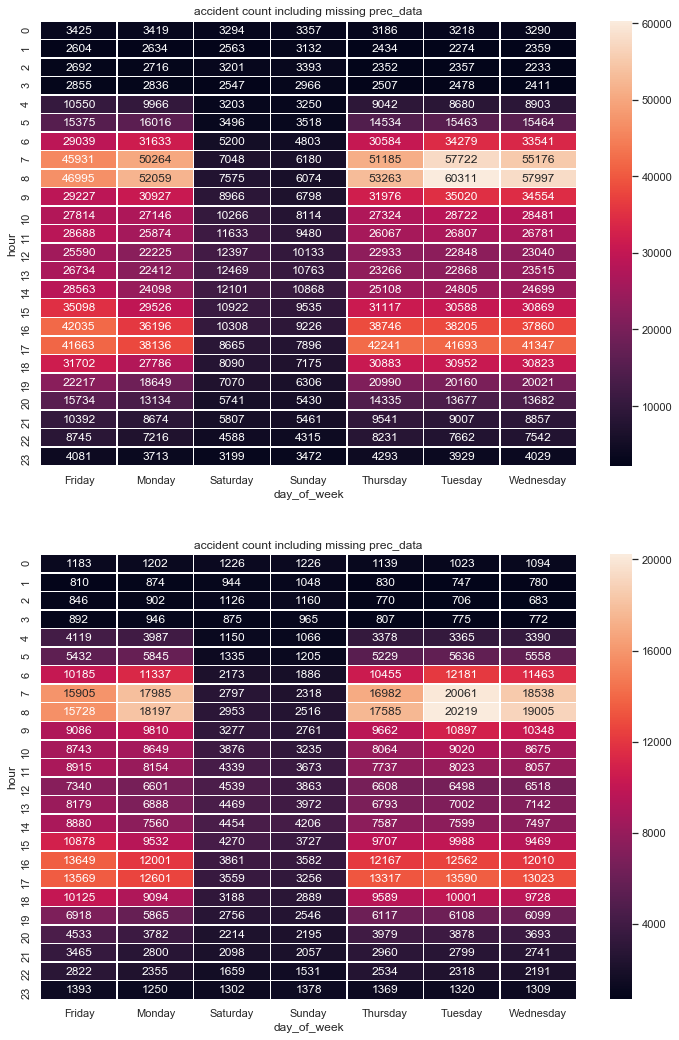

In [7]:
daytime_cntm = df[~df['precipitation(in)'].isnull()]\
                .groupby(by=['day_of_week', 'hour'])['id'].count().reset_index()

daytime_cntm = daytime_cntm.pivot(index='hour', columns='day_of_week', values='id')

daytime_cntt = df.groupby(by=['day_of_week', 'hour'])['id'].count().reset_index()

daytime_cntt = daytime_cntt.pivot(index='hour', columns='day_of_week', values='id')

f, ax = plt.subplots(2, 1, figsize=(12,18))
gt = sns.heatmap(daytime_cntt, fmt='d',annot=True, 
                 linewidth=.5, ax=ax[0]).set_title('accident count including missing prec_data')

gm = sns.heatmap(daytime_cntm, fmt='d',annot=True, 
                 linewidth=.5, ax=ax[1]).set_title('accident count including missing prec_data')



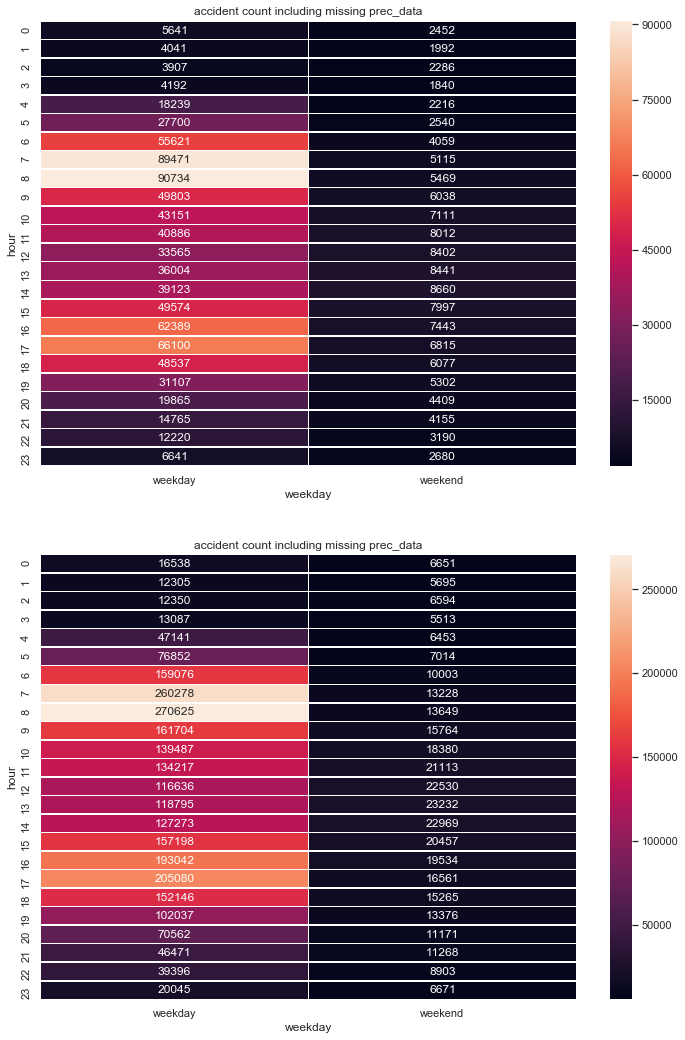

In [8]:
weekday_cntm = df[~df['precipitation(in)'].isnull()]\
                    .groupby(by=['weekday', 'hour'])['id'].count().reset_index()

weekday_cntm = weekday_cntm.pivot(index='hour', columns='weekday', values='id')

weekday_cntt = df.groupby(by=['weekday', 'hour'])['id'].count().reset_index()

weekday_cntt = weekday_cntt.pivot(index='hour', columns='weekday', values='id')

f, ax = plt.subplots(2, 1, figsize=(12,18))
gt = sns.heatmap(weekday_cntm, fmt='d',annot=True, 
                 linewidth=.5, ax=ax[0]).set_title('accident count including missing prec_data')

gm = sns.heatmap(weekday_cntt, fmt='d',annot=True, 
                 linewidth=.5, ax=ax[1]).set_title('accident count including missing prec_data')

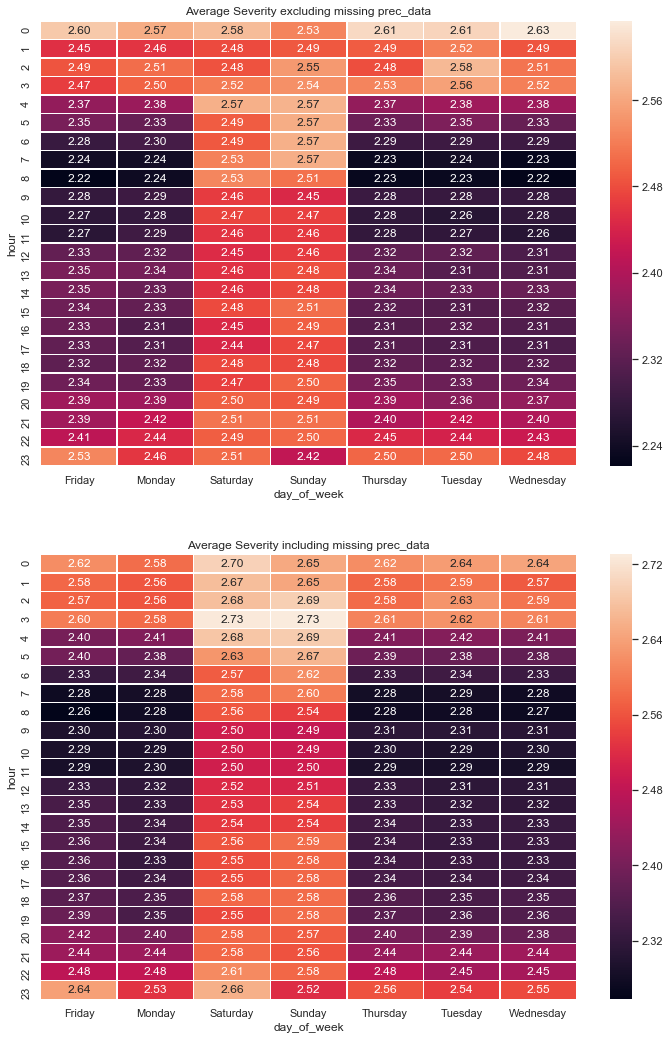

In [9]:
df['severity'] = df['severity'].astype(int)

day_time1 = df[~df['precipitation(in)']\
                .isnull()].groupby(by=['day_of_week', 'hour'])['severity'].mean().reset_index()

day_time1 = day_time1.pivot(index='hour', columns='day_of_week', values='severity')

day_time2 = df.groupby(by=['day_of_week', 'hour'])['severity'].mean().reset_index()

day_time2 = day_time2.pivot(index='hour', columns='day_of_week', values='severity')

f, ax = plt.subplots(2, 1, figsize=(12,18))
g1 = sns.heatmap(day_time1, fmt='.2f',annot=True, 
                linewidth=.5, ax=ax[0]).set_title('Average Severity excluding missing prec_data')

g2 = sns.heatmap(day_time2, fmt='.2f',annot=True, 
                linewidth=.5, ax=ax[1]).set_title('Average Severity including missing prec_data')

plt.show()

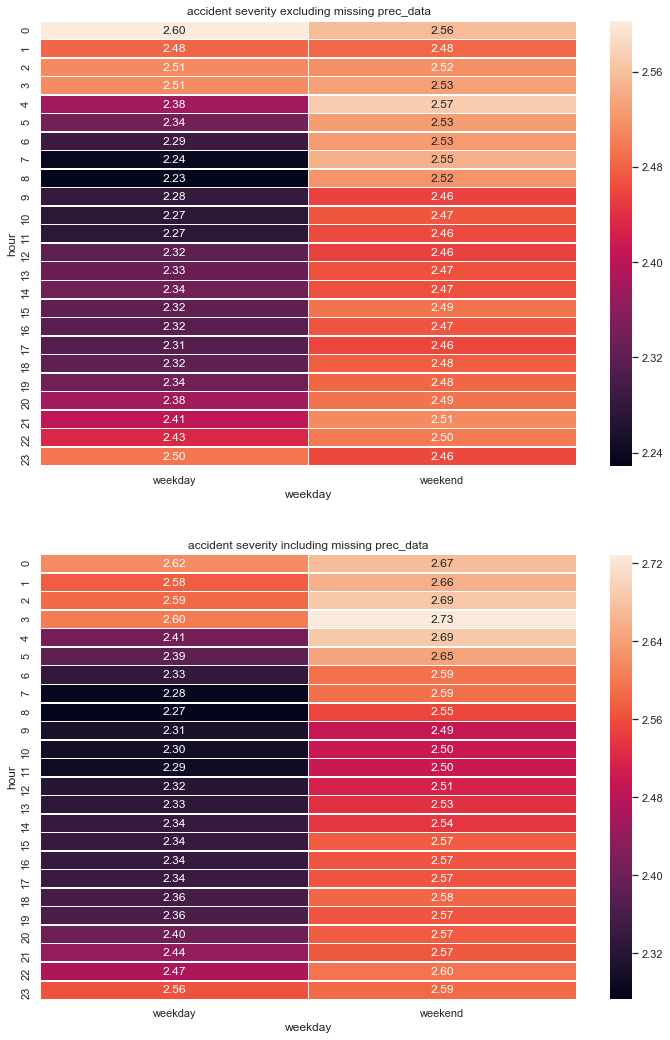

In [10]:
df['severity'] = df['severity'].astype(int)

weekday_cntm = df[~df['precipitation(in)'].isnull()].groupby(by=['weekday', 'hour'])['severity'].mean().reset_index()
weekday_cntm = weekday_cntm.pivot(index='hour', columns='weekday', values='severity')

weekday_cntt = df.groupby(by=['weekday', 'hour'])['severity'].mean().reset_index()
weekday_cntt = weekday_cntt.pivot(index='hour', columns='weekday', values='severity')

f, ax = plt.subplots(2, 1, figsize=(12,18))
gt = sns.heatmap(weekday_cntm, fmt='.2f',annot=True, 
                 linewidth=.5, ax=ax[0]).set_title('accident severity excluding missing prec_data')

gm = sns.heatmap(weekday_cntt, fmt='.2f',annot=True, 
                 linewidth=.5, ax=ax[1]).set_title('accident severity including missing prec_data')

0
1
2
3
4
5


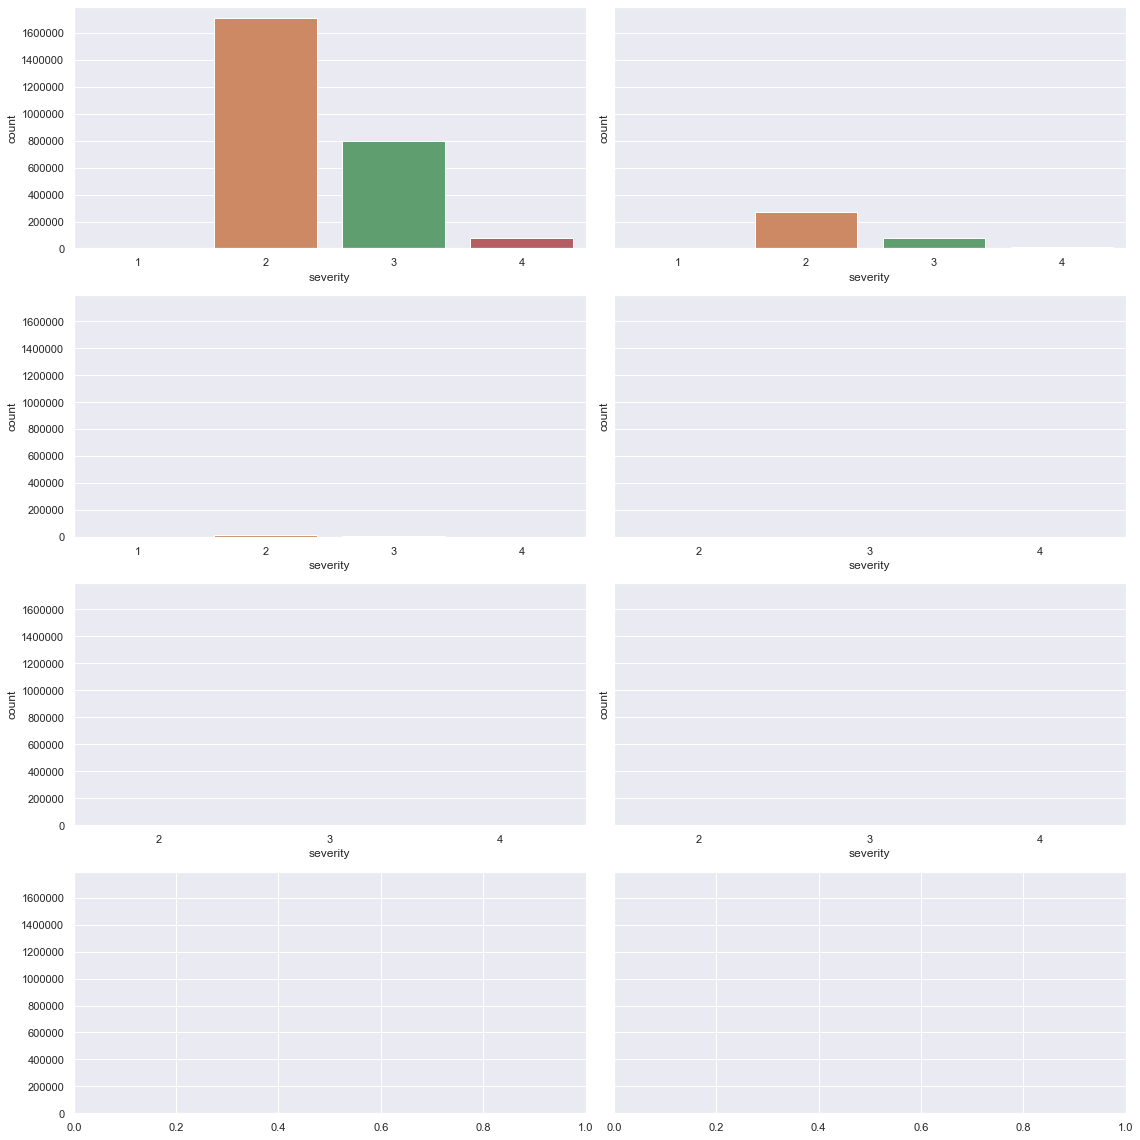

In [11]:
w = df.weather_condition.unique()

weather_list = []

for i in range(0, len(w), 20):
    weather_list.append(w[i:i+20])

f, axes = plt.subplots(4,2, figsize=(16,16), sharey=True)

i = 0
g = {}

for ax_row in axes:
    if i >= len(weather_list) - 1:
        break
    for ax in ax_row:
        g[i] = sns.countplot(x=df[df['weather_condition'].isin(weather_list[i])]['severity'], 
                             data=df, ax=ax)
        print(i)
        i += 1

plt.tight_layout()
plt.show()

In [16]:
w_stats = df.groupby(by='weather_condition')['severity'].describe().reset_index()
w_stats['%total'] = round(w_stats['count'] / w_stats['count'].sum() * 100,2)

w_stats = w_stats.sort_values(by='count', ascending=False).reset_index()
w_stats

,index,weather_condition,count,mean,std,min,25%,50%,75%,max,%total
0,5,Clear,808171.0,2.368053,0.546725,1.0,2.00,2.0,3.00,4.0,27.79
1,72,Mostly Cloudy,412528.0,2.366739,0.536562,1.0,2.00,2.0,3.00,4.0,14.18
2,75,Overcast,382480.0,2.385542,0.556698,1.0,2.00,2.0,3.00,4.0,13.15
3,12,Fair,335289.0,2.272720,0.505642,1.0,2.00,2.0,2.00,4.0,11.53
4,78,Partly Cloudy,295439.0,2.348119,0.526090,1.0,2.00,2.0,3.00,4.0,10.16
5,88,Scattered Clouds,204662.0,2.380466,0.542870,1.0,2.00,2.0,3.00,4.0,7.04
6,52,Light Rain,141073.0,2.387629,0.545045,1.0,2.00,2.0,3.00,4.0,4.85
7,6,Cloudy,115496.0,2.302729,0.521243,1.0,2.00,2.0,3.00,4.0,3.97
8,59,Light Snow,42123.0,2.463523,0.597716,1.0,2.00,2.0,3.00,4.0,1.45
9,20,Haze,34315.0,2.362028,0.514677,1.0,2.00,2.0,3.00,4.0,1.18


In [9]:
month_df = df.groupby(by='month')['severity'].describe().reset_index()
month_df

,month,count,mean,std,min,25%,50%,75%,max
0,1,209972.0,2.385704,0.552263,1.0,2.0,2.0,3.0,4.0
1,2,198649.0,2.377913,0.549434,1.0,2.0,2.0,3.0,4.0
2,3,207427.0,2.379015,0.551166,1.0,2.0,2.0,3.0,4.0
3,4,211763.0,2.373531,0.546242,1.0,2.0,2.0,3.0,4.0
4,5,209060.0,2.376433,0.553150,1.0,2.0,2.0,3.0,4.0
5,6,210025.0,2.402938,0.558792,1.0,2.0,2.0,3.0,4.0
6,7,222959.0,2.388838,0.556888,1.0,2.0,2.0,3.0,4.0
7,8,288912.0,2.357483,0.534587,1.0,2.0,2.0,3.0,4.0
8,9,292430.0,2.335407,0.525893,1.0,2.0,2.0,3.0,4.0
9,10,324525.0,2.319109,0.521565,1.0,2.0,2.0,3.0,4.0


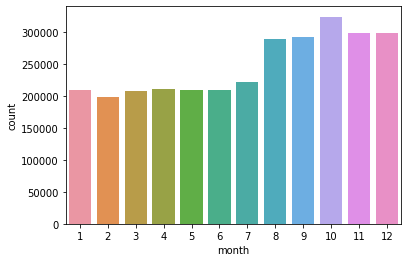

In [10]:
sns.barplot(x='month', y='count', data=month_df)

,precipitation(in),severity,temperature(f)
count,971381.000000,971381.000000,971381.000000
mean,0.020537,2.329077,62.204258
std,0.236278,0.530099,18.380372
min,0.000000,1.000000,-33.000000
25%,0.000000,2.000000,50.000000
50%,0.000000,2.000000,64.000000
75%,0.000000,3.000000,76.000000
max,25.000000,4.000000,115.000000


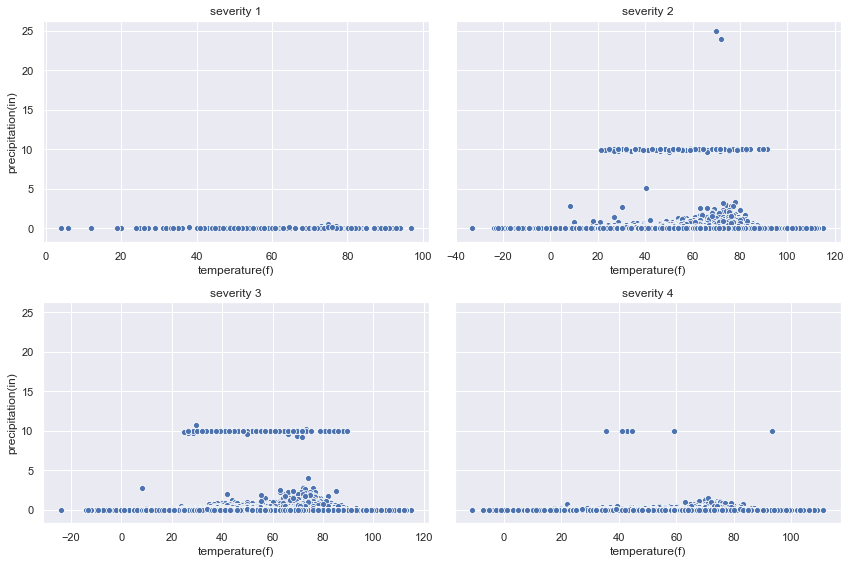

In [13]:
prec = df[['precipitation(in)', 'severity', 'temperature(f)']].dropna()

display(prec.describe())

sns.set()
f, axes = plt.subplots(2,2, figsize=(12,8), sharey=True)

i = 1
g = {}

for ax_row in axes:
    for ax in ax_row:
        g[i] = sns.scatterplot(x=prec[prec['severity'] == i]['temperature(f)'], 
                               y= prec[prec['severity'] == i]['precipitation(in)'],
                             data=prec, ax=ax).set_title('severity ' + str(i))
        i += 1

plt.tight_layout()
plt.show()